<a href="https://colab.research.google.com/github/hahaha-777h/titanic-kaggle/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

特徴量: familysizeを作る。 92%, 79%, 73%<br>
年齢の欠損データを埋めるときに、今の散らばりと同じように入れる。<br>
チケットについて、数字以外を消してint型に直して特徴量にする<br>
cabinを特徴量に入れる。(欠損血が多すぎるからなくてもいいかも）<br>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
dir_path = "/content/drive/MyDrive/kaggle/titanic/"
train_df = pd.read_csv(dir_path + "train.csv")
test_df = pd.read_csv(dir_path + "test.csv")

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print("train data: ", train_df.shape)
print("test data: ", test_df.shape)


train data:  (891, 12)
test data:  (418, 11)


In [ ]:
train_df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
train_df.notnull().sum()

,0
PassengerId,891
Survived,891
Pclass,891
Name,891
Sex,891
Age,714
SibSp,891
Parch,891
Ticket,891
Fare,891


In [ ]:
test_df.notnull().sum()

,0
PassengerId,418
Pclass,418
Name,418
Sex,418
Age,332
SibSp,418
Parch,418
Ticket,418
Fare,417
Cabin,91


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df = pd.concat([train_df, test_df], ignore_index=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [ ]:
df['Ticket'].tail(20)

,Ticket
1289,347065
1290,21332
1291,36928
1292,28664
1293,112378
1294,113059
1295,17765
1296,SC/PARIS 2166
1297,28666
1298,113503


In [ ]:
# Visualize by sex column

gender_count = df.groupby("Sex").size()
gender_count

,0
Sex,
female,466
male,843


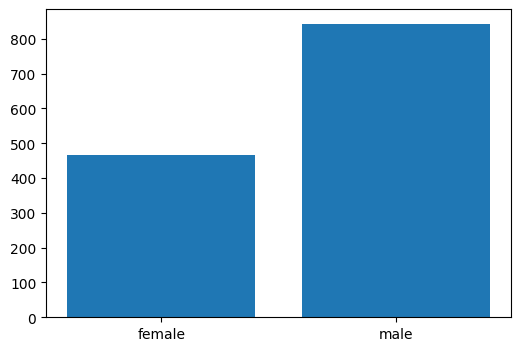

<Axes: xlabel='Sex'>

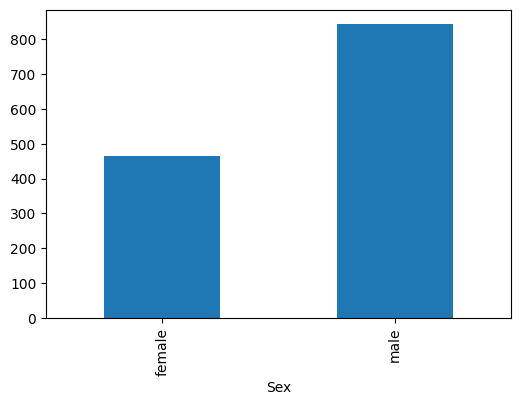

In [ ]:
# matplotlib
plt.figure(figsize=(6, 4))
plt.bar(gender_count.index, gender_count.values)
plt.show()

# pandas
gender_count.plot(kind="bar", figsize=(6, 4))

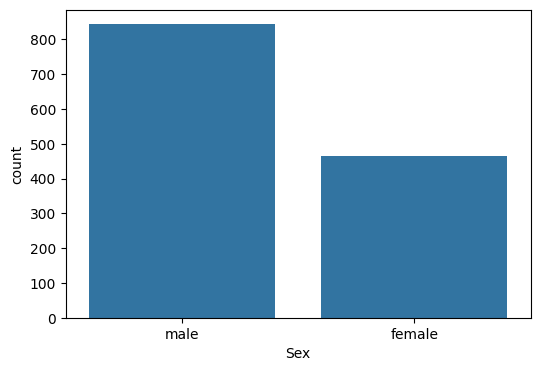

In [ ]:
#seaborn使うといい

plt.figure(figsize=(6, 4))

sns.countplot(data=df, x="Sex")
plt.show()

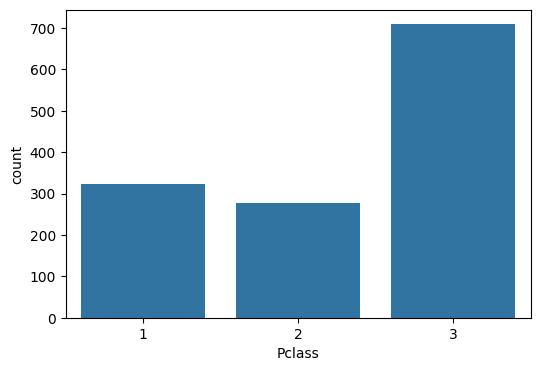

In [ ]:
plt.figure(figsize=(6, 4))

sns.countplot(data = df, x = "Pclass")
plt.show()

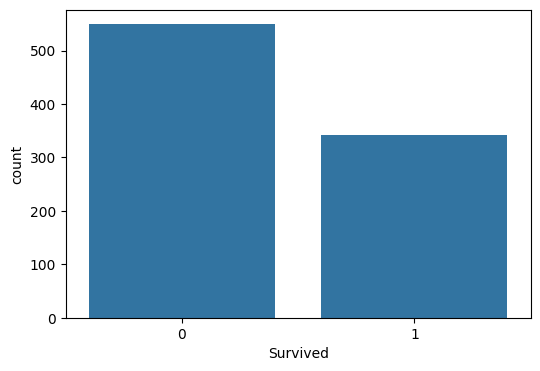

In [ ]:
plt.figure(figsize=(6, 4))

sns.countplot(data = train_df, x = "Survived")
plt.show()

In [ ]:
df2 = df.drop(columns=["Cabin", "Fare", "Ticket", "Name"])
print(df2.head())
df2.isnull().sum()

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch Embarked
0            1       0.0       3    male  22.0      1      0        S
1            2       1.0       1  female  38.0      1      0        C
2            3       1.0       3  female  26.0      0      0        S
3            4       1.0       1  female  35.0      1      0        S
4            5       0.0       3    male  35.0      0      0        S


,0
PassengerId,0
Survived,418
Pclass,0
Sex,0
Age,263
SibSp,0
Parch,0
Embarked,2


In [ ]:
df2["familysize"] = df2["SibSp"] + df2["Parch"] + 1


In [ ]:
df2 = df2.drop(columns=["SibSp", "Parch"])
df2.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,familysize
0,1,0.0,3,male,22.0,S,2
1,2,1.0,1,female,38.0,C,2
2,3,1.0,3,female,26.0,S,1
3,4,1.0,1,female,35.0,S,2
4,5,0.0,3,male,35.0,S,1


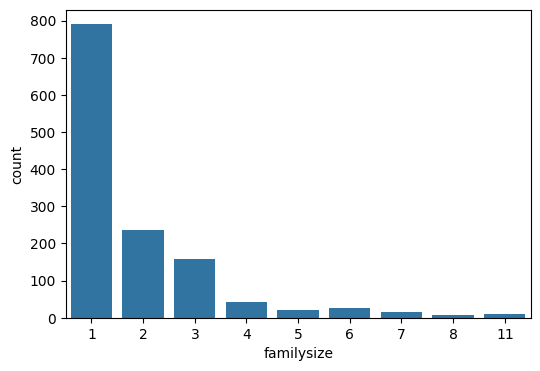

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df2, x="familysize")
plt.show()

In [ ]:
print("The number of Null in embarked: ", df2["Embarked"].isnull().sum())

The number of Null in embarked:  2


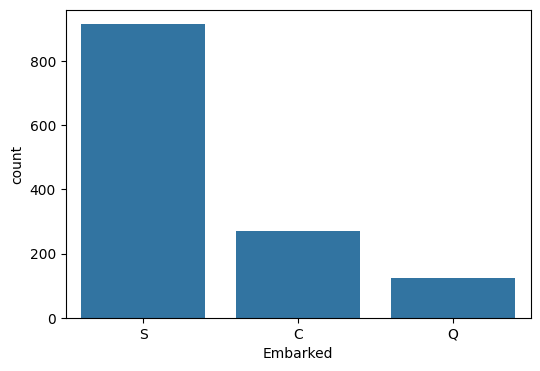

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df2, x="Embarked")
plt.show()

In [ ]:
df2_copied = df2.copy()
df2_copied["Embarked"] = df2_copied["Embarked"].fillna("S")
df2_copied.isnull().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Sex,0
Age,263
Embarked,0
familysize,0


In [ ]:
df2_copied.dtypes
df2_copied["Age"].isnull().sum()
print("Age min: ", df2_copied["Age"].min())
print("Age max: ", df2_copied["Age"].max())

Age min:  0.17
Age max:  80.0


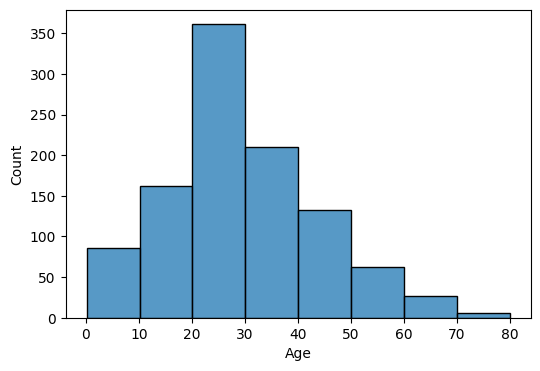

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df2_copied["Age"], kde=False, bins=8)
plt.show()

In [ ]:
print("Age mean: ", df2_copied["Age"].mean())
print("Age median: ", df2_copied["Age"].median())

Age mean:  29.881137667304014
Age median:  28.0


In [ ]:
df4 = df2_copied.copy()
df4['Age'] = df4['Age'].fillna(28)
df4.isnull().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Sex,0
Age,0
Embarked,0
familysize,0


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   Embarked     1309 non-null   object 
 6   familysize   1309 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 71.7+ KB


In [ ]:
ohe_embarked = pd.get_dummies(df4["Embarked"], prefix="Embarked")
ohe_embarked

,Embarked_C,Embarked_Q,Embarked_S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
1304,False,False,True
1305,True,False,False
1306,False,False,True
1307,False,False,True


In [ ]:
df5 = pd.concat([df4, ohe_embarked], axis = 1)
df5.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,familysize,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,male,22.0,S,2,False,False,True
1,2,1.0,1,female,38.0,C,2,True,False,False
2,3,1.0,3,female,26.0,S,1,False,False,True
3,4,1.0,1,female,35.0,S,2,False,False,True
4,5,0.0,3,male,35.0,S,1,False,False,True


In [ ]:
df6 = df5.drop(columns=["Embarked"])
df6

,PassengerId,Survived,Pclass,Sex,Age,familysize,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,male,22.0,2,False,False,True
1,2,1.0,1,female,38.0,2,True,False,False
2,3,1.0,3,female,26.0,1,False,False,True
3,4,1.0,1,female,35.0,2,False,False,True
4,5,0.0,3,male,35.0,1,False,False,True
...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,male,28.0,1,False,False,True
1305,1306,NaN,1,female,39.0,1,True,False,False
1306,1307,NaN,3,male,38.5,1,False,False,True
1307,1308,NaN,3,male,28.0,1,False,False,True


In [ ]:
df6["Sex"] = pd.get_dummies(df6["Sex"], drop_first=True)
df6

,PassengerId,Survived,Pclass,Sex,Age,familysize,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,True,22.0,2,False,False,True
1,2,1.0,1,False,38.0,2,True,False,False
2,3,1.0,3,False,26.0,1,False,False,True
3,4,1.0,1,False,35.0,2,False,False,True
4,5,0.0,3,True,35.0,1,False,False,True
...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,True,28.0,1,False,False,True
1305,1306,NaN,1,False,39.0,1,True,False,False
1306,1307,NaN,3,True,38.5,1,False,False,True
1307,1308,NaN,3,True,28.0,1,False,False,True


In [ ]:
train = df6[~df6["Survived"].isnull()]
test = df6[df6["Survived"].isnull()]
test

,PassengerId,Survived,Pclass,Sex,Age,familysize,Embarked_C,Embarked_Q,Embarked_S
891,892,NaN,3,True,34.5,1,False,True,False
892,893,NaN,3,False,47.0,2,False,False,True
893,894,NaN,2,True,62.0,1,False,True,False
894,895,NaN,3,True,27.0,1,False,False,True
895,896,NaN,3,False,22.0,3,False,False,True
...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,True,28.0,1,False,False,True
1305,1306,NaN,1,False,39.0,1,True,False,False
1306,1307,NaN,3,True,38.5,1,False,False,True
1307,1308,NaN,3,True,28.0,1,False,False,True


In [ ]:
print(train.head())
print("\n\n\n")
print(test.head())

   PassengerId  Survived  Pclass    Sex   Age  familysize  Embarked_C  \
0            1       0.0       3   True  22.0           2       False   
1            2       1.0       1  False  38.0           2        True   
2            3       1.0       3  False  26.0           1       False   
3            4       1.0       1  False  35.0           2       False   
4            5       0.0       3   True  35.0           1       False   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  




     PassengerId  Survived  Pclass    Sex   Age  familysize  Embarked_C  \
891          892       NaN       3   True  34.5           1       False   
892          893       NaN       3  False  47.0           2       False   
893          894       NaN       2   True  62.0           1       False   
894          895       NaN       3   True  27.0           1       False   
895          8

In [ ]:
test

,PassengerId,Survived,Pclass,Sex,Age,familysize,Embarked_C,Embarked_Q,Embarked_S
891,892,NaN,3,True,34.5,1,False,True,False
892,893,NaN,3,False,47.0,2,False,False,True
893,894,NaN,2,True,62.0,1,False,True,False
894,895,NaN,3,True,27.0,1,False,False,True
895,896,NaN,3,False,22.0,3,False,False,True
...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,True,28.0,1,False,False,True
1305,1306,NaN,1,False,39.0,1,True,False,False
1306,1307,NaN,3,True,38.5,1,False,False,True
1307,1308,NaN,3,True,28.0,1,False,False,True


In [ ]:
test = test.drop(columns=["Survived"])

In [ ]:
x_train = train.drop(columns=["Survived", "PassengerId"])
y_train = train["Survived"]
print(x_train.shape)
print(y_train.shape)


(891, 7)
(891,)


In [ ]:
x_train.head()

,Pclass,Sex,Age,familysize,Embarked_C,Embarked_Q,Embarked_S
0,3,True,22.0,2,False,False,True
1,1,False,38.0,2,True,False,False
2,3,False,26.0,1,False,False,True
3,1,False,35.0,2,False,False,True
4,3,True,35.0,1,False,False,True


In [ ]:
y_train.head()

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(
            random_state=42,
            min_samples_leaf=4
                               )
model.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

x_tr, x_va, y_tr, y_va = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [ ]:
print("train: ", x_tr.shape, y_tr.shape)
print("test: ", x_va.shape, y_va.shape)

train:  (712, 7) (712,)
test:  (179, 7) (179,)


In [ ]:
y_tr.value_counts()
print(y_tr.value_counts(normalize=True))

Survived
0.0    0.623596
1.0    0.376404
Name: proportion, dtype: float64


In [ ]:
y_va.value_counts()
print(y_va.value_counts(normalize=True))

Survived
0.0    0.586592
1.0    0.413408
Name: proportion, dtype: float64


In [ ]:
x_tr, x_va, y_tr, y_va = train_test_split(
    x_train, y_train,
    test_size=0.2,
    stratify=y_train,
    random_state=42, )

In [ ]:
print(y_tr.value_counts())
print(y_tr.value_counts(normalize=True))


Survived
0.0    439
1.0    273
Name: count, dtype: int64
Survived
0.0    0.616573
1.0    0.383427
Name: proportion, dtype: float64


In [ ]:
print(y_va.value_counts())
print(y_va.value_counts(normalize=True))


Survived
0.0    110
1.0     69
Name: count, dtype: int64
Survived
0.0    0.614525
1.0    0.385475
Name: proportion, dtype: float64


In [ ]:
model.fit(x_tr, y_tr)

DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

In [ ]:
y_tr_pred = model.predict(x_tr)
y_va_pred = model.predict(x_va)


In [ ]:
y_va_pred[:5]

array([0., 0., 0., 0., 1.])

In [ ]:
y_va[:5].values

array([0., 0., 1., 0., 1.])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_tr = accuracy_score(y_tr, y_tr_pred)
accuracy_va = accuracy_score(y_va, y_va_pred)

In [ ]:
print("\n\n\n\n\n\ntrain:", accuracy_tr)
print("valuate: ", accuracy_va)







train: 0.8693820224719101
valuate:  0.7653631284916201


In [ ]:
test.head()

,PassengerId,Pclass,Sex,Age,familysize,Embarked_C,Embarked_Q,Embarked_S
891,892,3,True,34.5,1,False,True,False
892,893,3,False,47.0,2,False,False,True
893,894,2,True,62.0,1,False,True,False
894,895,3,True,27.0,1,False,False,True
895,896,3,False,22.0,3,False,False,True


In [ ]:
test_pre = test.drop(columns=["PassengerId"])
y_test_pred = model.predict(test_pre)
y_test_pred[:5]

array([0., 0., 0., 0., 1.])

In [ ]:
test["Survived"] = y_test_pred
test

,PassengerId,Pclass,Sex,Age,familysize,Embarked_C,Embarked_Q,Embarked_S,Survived
891,892,3,True,34.5,1,False,True,False,0.0
892,893,3,False,47.0,2,False,False,True,0.0
893,894,2,True,62.0,1,False,True,False,0.0
894,895,3,True,27.0,1,False,False,True,0.0
895,896,3,False,22.0,3,False,False,True,1.0
...,...,...,...,...,...,...,...,...,...
1304,1305,3,True,28.0,1,False,False,True,0.0
1305,1306,1,False,39.0,1,True,False,False,1.0
1306,1307,3,True,38.5,1,False,False,True,0.0
1307,1308,3,True,28.0,1,False,False,True,0.0


In [ ]:
submit_df = test[["PassengerId", "Survived"]].set_index("PassengerId")

In [ ]:
submit_df.head()

,Survived
PassengerId,
892,0.0
893,0.0
894,0.0
895,0.0
896,1.0


In [ ]:
submit_df["Survived"] = submit_df["Survived"].astype(int)
submit_df.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [ ]:
submit_df.to_csv("submission.csv")